In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [2]:
info_df = pd.read_csv('data/df_info_selected_subjects_table.csv')
embeddings_df = pd.read_csv('data/encoder_embeddings.csv')

In [3]:
info_selected = info_df[['id', 'sex', 'age', 'height', 'weight', 'bmi']]

In [4]:
embeddings_df['id'] = range(31, 41)
embeddings_df

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,id
0,71.772980,-450.41714,378.86826,453.77710,-307.18280,453.67538,453.59850,-27.245577,181.286440,-459.28043,...,86.036450,335.42383,-718.05480,597.88070,721.74150,-500.64224,722.19320,725.21265,2.107117,31
1,65.180380,-320.35034,267.75440,322.19693,-209.52574,322.87540,323.02454,6.148699,1933.905600,-2322.80520,...,567.642800,-231.90364,-1854.79860,1765.28400,1878.43270,-766.39667,1887.33900,1862.68090,-159.305020,32
2,-48.357360,-1120.64070,1032.44480,1128.23800,-67.04883,1134.73360,1128.96910,14.895543,720.884300,-1381.35950,...,58.134457,157.25072,-488.36035,397.18900,490.65472,-290.06595,491.30032,491.98068,73.775000,33
3,155.373290,-571.38400,470.69327,574.23090,-360.24576,575.12230,575.62040,31.983633,444.625460,-1057.77320,...,67.843230,204.20340,-594.17706,484.60540,596.49770,-366.76035,597.78820,598.65765,69.943634,34
4,-2642.519800,-4178.87700,4024.35230,4354.25630,-2387.38570,4350.36800,4211.68950,-2362.656500,906.449900,-1789.59830,...,105.165530,256.03644,-821.40870,675.48110,824.79760,-489.45010,826.57300,827.74164,87.138760,35
5,-1012.402650,-5252.60400,5054.68070,5416.78370,-2289.48340,5467.81840,5281.06540,516.415470,14.339768,-877.12550,...,66.222010,227.68620,-640.03503,518.69214,642.62400,-402.86590,643.76483,644.81946,85.246710,36
6,16.728300,-636.76470,532.54330,641.98083,-450.71127,641.55493,641.61870,-63.263397,-173.131880,-959.49190,...,54.146225,277.43160,-691.17267,554.12720,693.59610,-435.52540,695.19135,696.40230,96.262330,37
7,93.047295,-322.92940,265.78644,324.33080,-212.34247,324.98190,325.17520,18.511131,29.252384,-507.75730,...,472.688780,129.66394,-393.95490,320.78043,395.59448,-247.25403,396.41016,396.94562,39.333103,38
8,-5298.762000,-9773.54600,8418.63600,10036.95900,-1605.28630,10094.23700,9808.30200,-1992.720300,4139.765000,-8034.86430,...,56.368150,4057.28400,-5012.54600,3804.53830,5028.70950,-3349.00500,5051.39700,5056.18160,2161.664000,39
9,-2348.781500,-3092.04050,2970.29880,3229.06150,-2253.86740,3211.52440,3110.37280,-1869.760100,149.026610,-495.96167,...,70.719020,175.18666,-509.22473,416.38156,511.18158,-315.63745,512.43646,513.03070,63.153957,40


In [5]:
merged_df = pd.merge(embeddings_df, info_selected, on='id')

In [6]:
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embeddings_2d = tsne.fit_transform(merged_df.drop(columns=['id', 'sex', 'age', 'height', 'weight', 'bmi']))

In [7]:
embeddings_2d_df = pd.DataFrame(embeddings_2d, columns=['TSNE1', 'TSNE2'])

In [8]:
embeddings_2d_df[['id', 'sex', 'age', 'height', 'weight', 'bmi']] = merged_df[['id', 'sex', 'age', 'height', 'weight', 'bmi']]

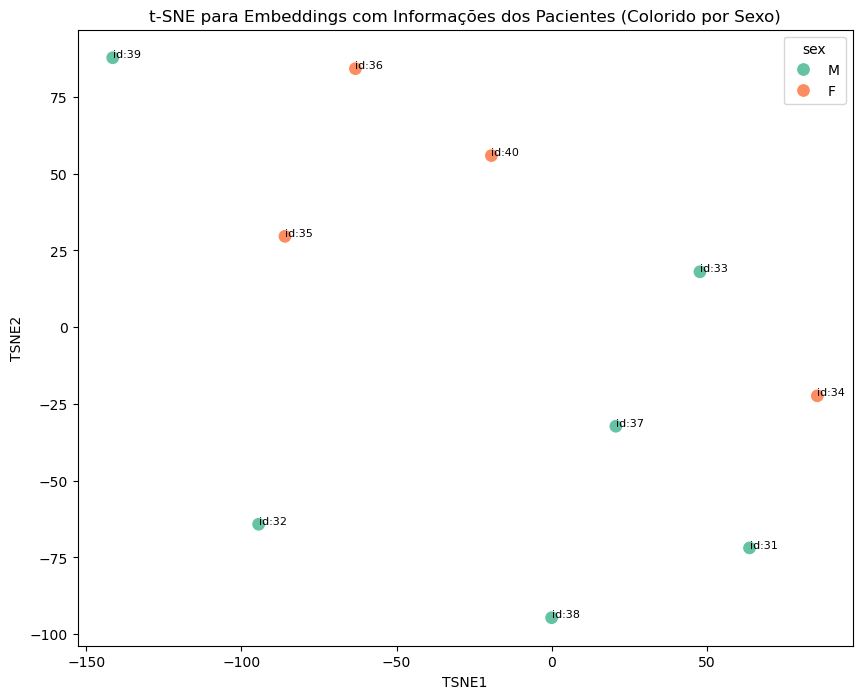

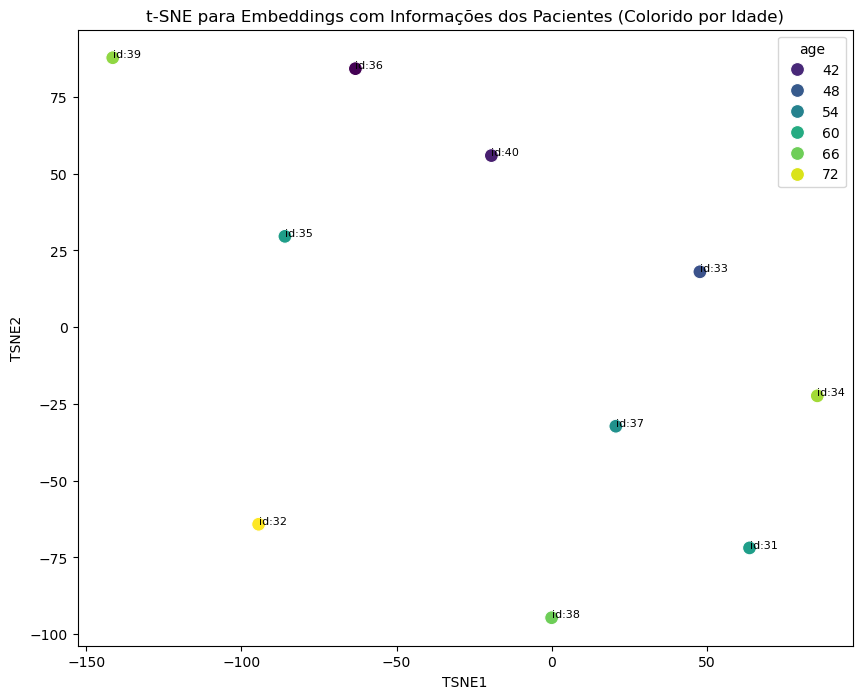

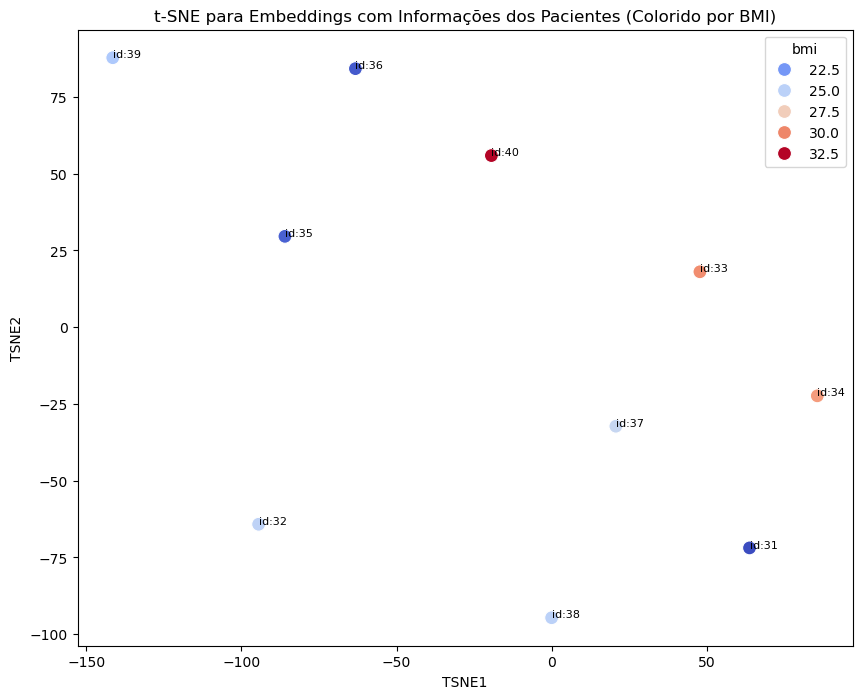

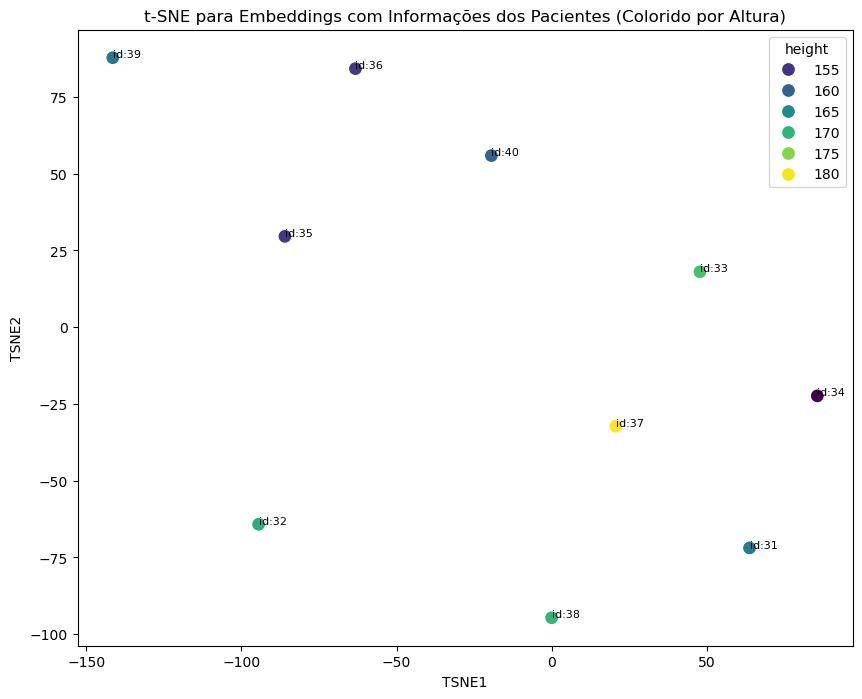

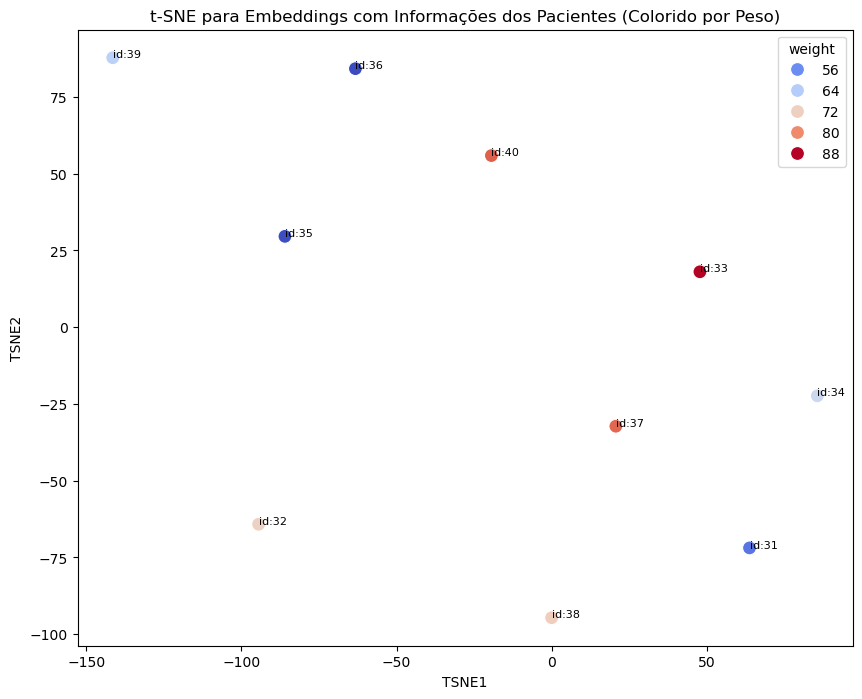

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='sex', data=embeddings_2d_df, palette='Set2', s=100)
for i in range(len(embeddings_2d_df)):
    plt.text(embeddings_2d_df['TSNE1'][i], embeddings_2d_df['TSNE2'][i], f'id:{embeddings_2d_df["id"][i]}', fontsize=8)
plt.title('t-SNE para Embeddings com Informações dos Pacientes (Colorido por Sexo)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='age', data=embeddings_2d_df, palette='viridis', s=100)
for i in range(len(embeddings_2d_df)):
    plt.text(embeddings_2d_df['TSNE1'][i], embeddings_2d_df['TSNE2'][i], f'id:{embeddings_2d_df["id"][i]}', fontsize=8)
plt.title('t-SNE para Embeddings com Informações dos Pacientes (Colorido por Idade)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='bmi', data=embeddings_2d_df, palette='coolwarm', s=100)
for i in range(len(embeddings_2d_df)):
    plt.text(embeddings_2d_df['TSNE1'][i], embeddings_2d_df['TSNE2'][i], f'id:{embeddings_2d_df["id"][i]}', fontsize=8)
plt.title('t-SNE para Embeddings com Informações dos Pacientes (Colorido por BMI)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='height', data=embeddings_2d_df, palette='viridis', s=100)
for i in range(len(embeddings_2d_df)):
    plt.text(embeddings_2d_df['TSNE1'][i], embeddings_2d_df['TSNE2'][i], f'id:{embeddings_2d_df["id"][i]}', fontsize=8)
plt.title('t-SNE para Embeddings com Informações dos Pacientes (Colorido por Altura)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='weight', data=embeddings_2d_df, palette='coolwarm', s=100)
for i in range(len(embeddings_2d_df)):
    plt.text(embeddings_2d_df['TSNE1'][i], embeddings_2d_df['TSNE2'][i], f'id:{embeddings_2d_df["id"][i]}', fontsize=8)
plt.title('t-SNE para Embeddings com Informações dos Pacientes (Colorido por Peso)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

